## Assignment 2: Image Classification with Neural Networks

* Using the same workflow as Assignment 1, now tackle a more complex dataset — ,
which contains small 32x32 color images across 100 different categories.
* Load the CIFAR-100 dataset using an available library (e.g., tf.keras.datasets).
* Visualize sample images and examine class labels.
* Normalize the images.
* One-hot encode the labels.
* Construct a deeper CNN suitable for a 100-class classification task.
* Train your model and monitor performance with learning curves.
* Evaluate test accuracy and provide a confusion matrix.
* Report class-wise accuracy if possible.
* Compare the CIFAR-100 results to your MNIST model.
* Discuss the challenges in CIFAR-100 (e.g., more classes, more complex images).
* Suggest possible improvements or future work.

### 1. Importing Libraris

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

### 2. Loading and Splitting Dataset

In [2]:
cifar=tf.keras.datasets.cifar100

In [3]:
cifar

<module 'keras.api.datasets.cifar100' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/cifar100/__init__.py'>

In [4]:
(training_images,training_labels),(test_images,test_labels)= cifar.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [5]:
print(training_images.shape)
print(test_images.shape)
print(training_labels.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


### 3. Displaying Labels

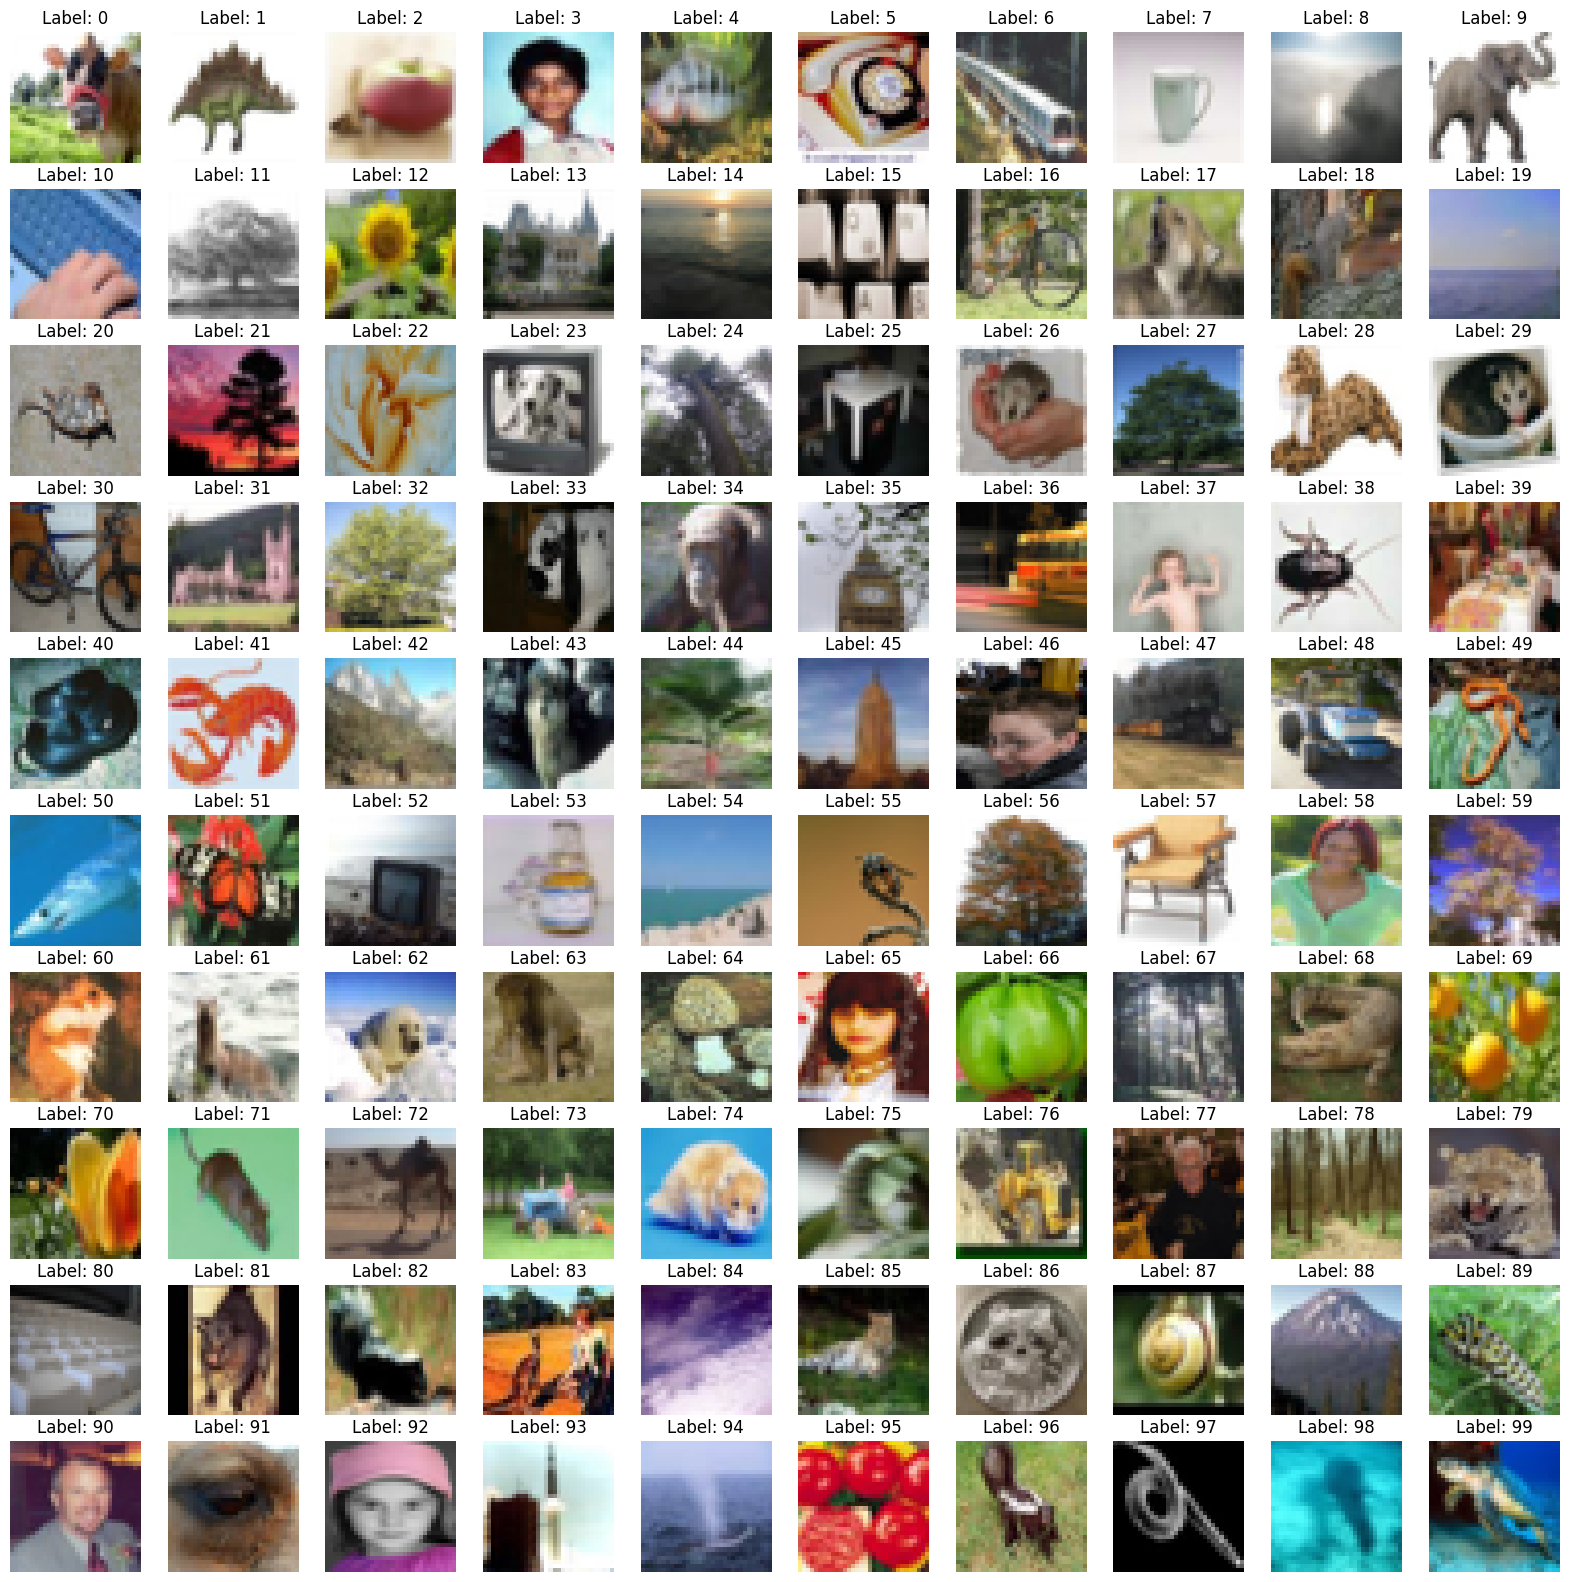

In [7]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(training_images[i])
  plt.title(f'Label: {i}')
  plt.axis('off')
plt.show()

### 4. Normalizing Pixel Values

In [8]:
training_images=(training_images)/255
test_images=(test_images)/255

### 5. One Hot Encoding Of Labels

In [9]:
from tensorflow.keras.utils import to_categorical

training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

### 6. Splitting the data into training, validation and test sets

In [10]:
from sklearn.model_selection import train_test_split


training_images, validation_images, training_labels, validation_labels = train_test_split(
    training_images, training_labels, test_size=0.2, random_state=42
)

print("Training images shape:", training_images.shape)
print("Validation images shape:", validation_images.shape)
print("Training labels shape:", training_labels.shape)
print("Validation labels shape:", validation_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training images shape: (40000, 32, 32, 3)
Validation images shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


### 7. Construct a CNN Model using a Deep Learning Framework

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

#Conv2D: To detect patterns like edges or textures
#relu: to introduce non-linearity to learn complex things
#padding=same : for same output size as input
#Tells the model the shape of each input image
#Batch NormalizationMakes training faster and more stable by normalizing layer outputs.

    Conv2D(128, (3, 3), activation='relu', padding='same'), #In CNN number we increase number of neurons
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

# MaxPooling2D((2, 2)): Shrinks the image to reduce size and keep only important features.
# Dropout(0.25): Turns off 25% of neurons randomly to prevent overfitting.

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

# Flatten(): Converts the 3D feature maps into a 1D list to feed into dense layers.
# Dense(512, relu): Fully connected layer with 512 neurons.
# Dropout(0.5): Drop half the neurons to prevent overfitting.
# Dense(100, softmax): Output layer with 100 neurons (one for each class).
# Softmax gives probabilities for each class.

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# Adam is the optimizer (helps the model learn).
# categorical_crossentropy is used for multi-class classification (since we used one-hot labels).

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,706,084 (10.32 MB)

 Trainable params: 2,705,188 (10.32 MB)

 Non-trainable params: 896 (3.50 KB)

### 8. Train the Model

In [12]:
early_stopping = EarlyStopping(patience=5)
history = model.fit(
    training_images, training_labels, epochs=20, validation_data=(
        validation_images, validation_labels), verbose=1, callbacks=[early_stopping])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.0130 - loss: 4.8040 - val_accuracy: 0.0179 - val_loss: 4.5326
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0136 - loss: 4.5470 - val_accuracy: 0.0181 - val_loss: 4.4521
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.0165 - loss: 4.5296 - val_accuracy: 0.0196 - val_loss: 4.4337
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.0159 - loss: 4.5173 - val_accuracy: 0.0195 - val_loss: 4.4546
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.0145 - loss: 4.5396 - val_accuracy: 0.0237 - val_loss: 4.4298
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0154 - loss: 4.5173 - val_accuracy: 0.0208 - val_loss: 4.4336
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0155 - loss: 4.5051 - val_accuracy: 0.0236 - val_loss: 4.3990
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.0171 - loss: 

### 9. Plotting training and validation accuracy/loss

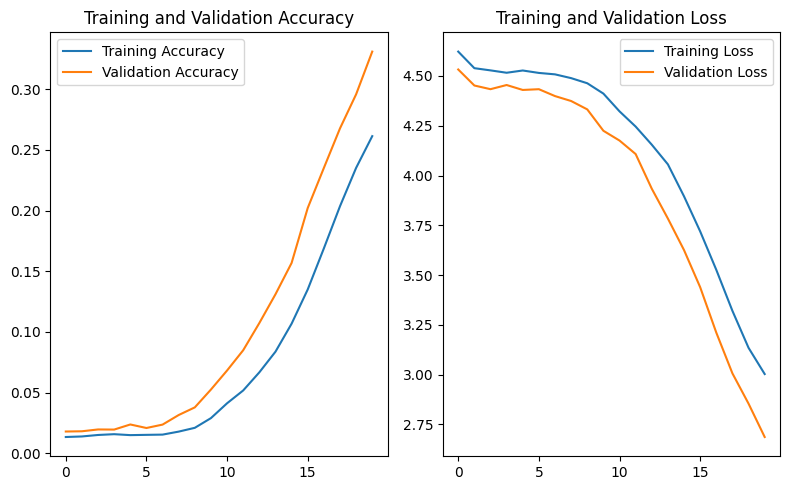

In [13]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

### 10. Evaluate performance on Test Set

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.3374 - loss: 2.6529

Test accuracy: 0.33739998936653137


### 11. Include model summary, performance metrics (accuracy, confusion matrix), and learning curves.

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,116,462 (30.96 MB)

 Trainable params: 2,705,188 (10.32 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 5,410,378 (20.64 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


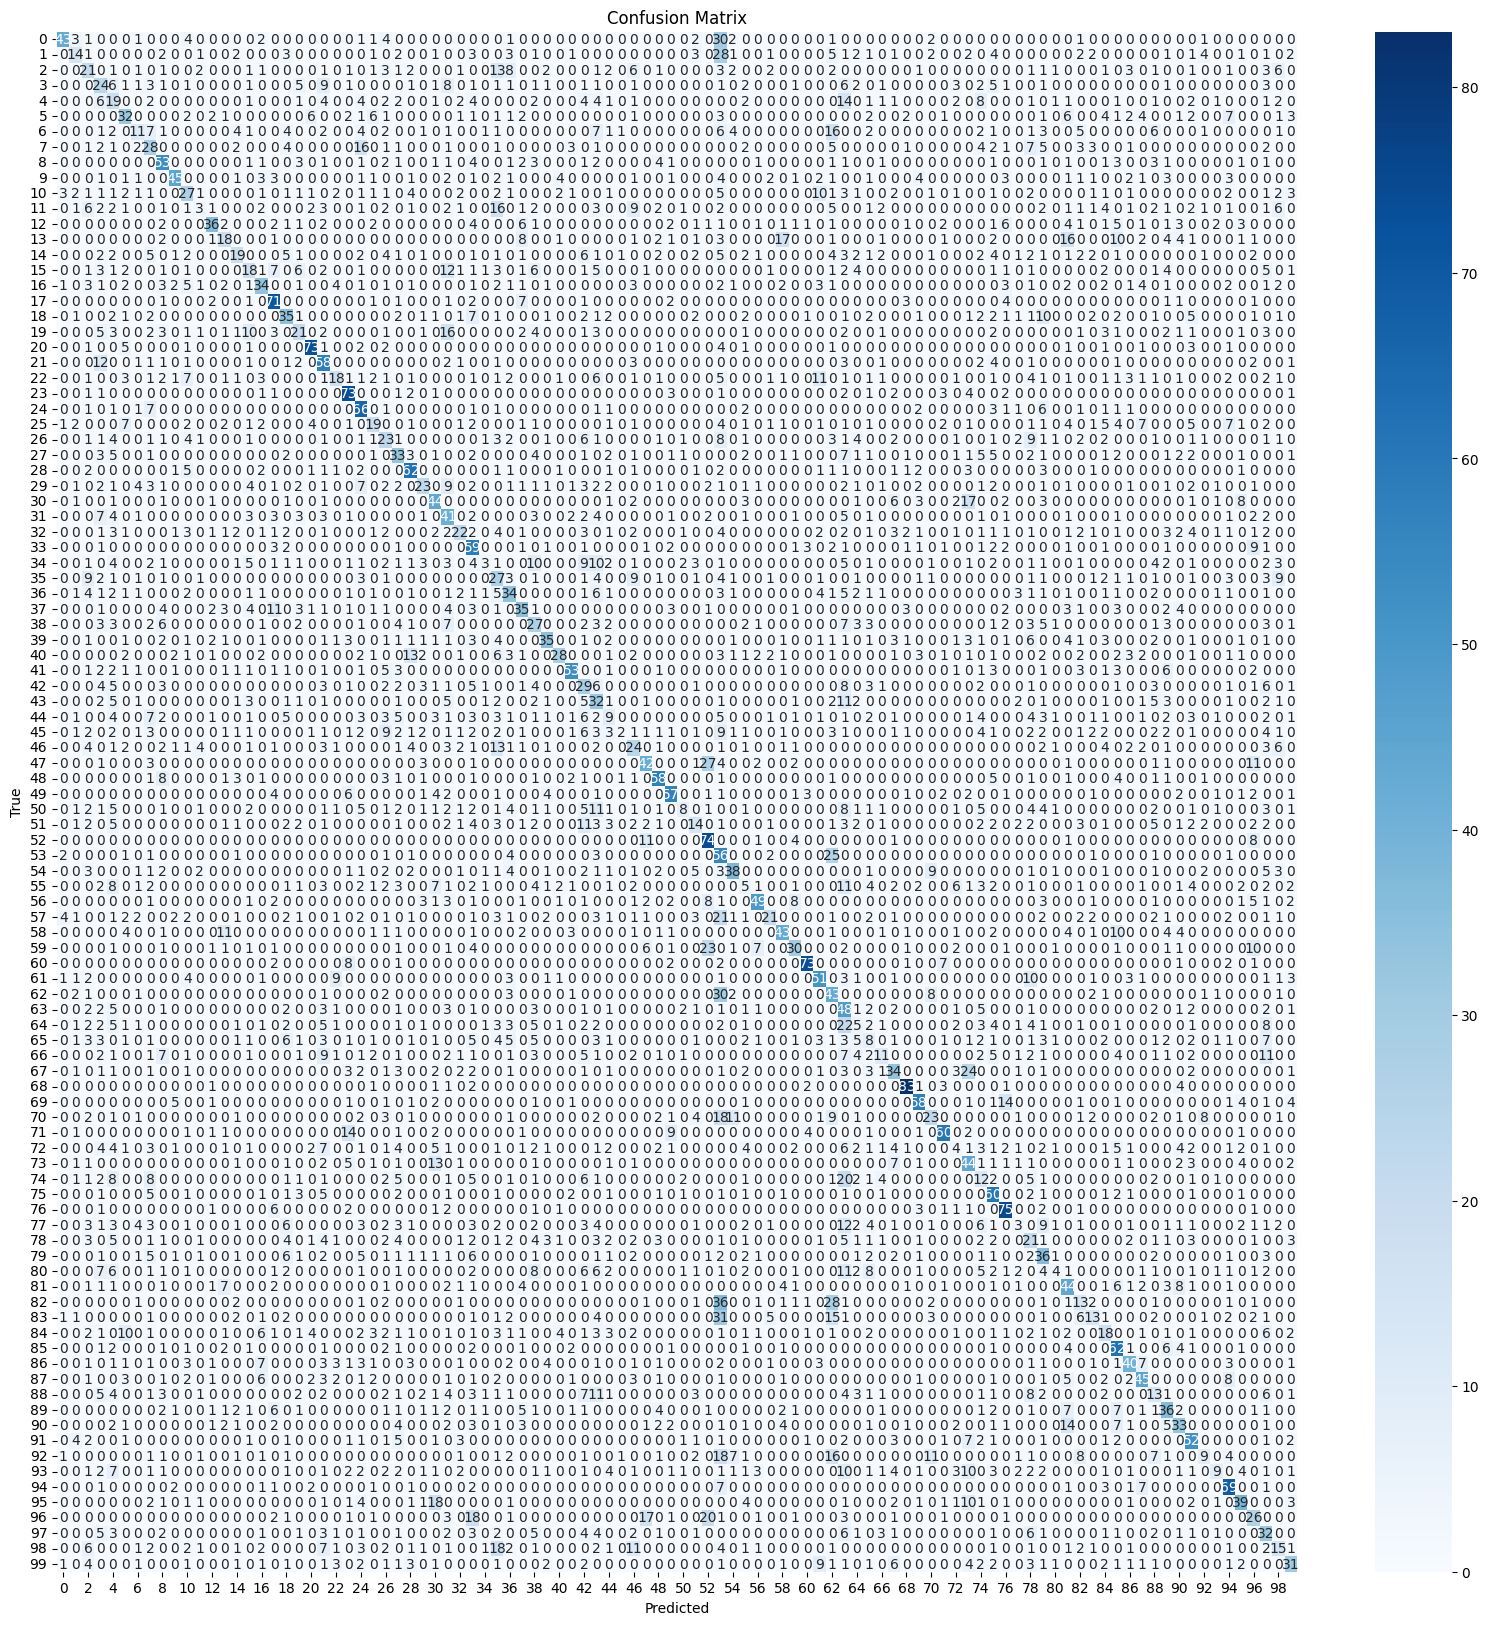

              precision    recall  f1-score   support

           0       0.74      0.43      0.54       100
           1       0.31      0.14      0.19       100
           2       0.19      0.21      0.20       100
           3       0.17      0.24      0.20       100
           4       0.11      0.19      0.14       100
           5       0.35      0.32      0.34       100
           6       0.24      0.11      0.15       100
           7       0.22      0.28      0.25       100
           8       0.40      0.53      0.45       100
           9       0.67      0.45      0.54       100
          10       0.29      0.27      0.28       100
          11       0.12      0.03      0.05       100
          12       0.60      0.36      0.45       100
          13       0.29      0.18      0.22       100
          14       0.33      0.19      0.24       100
          15       0.25      0.18      0.21       100
          16       0.38      0.34      0.36       100
          17       0.51    

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

conf_mat = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred_classes))

### 12. Comparing with Mnist Model

###### MNIST Test Accuracy: 0.90
##### CIFAR-100 Test Accuracy: 0.34

###### Comparison ---> CIFAR-100 is significantly more complex than MNIST due to
* Higher number of classes (100 vs. 10)
* Larger images (32x32 color images vs. 28x28 grayscale)
* More complex image content

### 13. Challenges

1. Increased Number of Classes:CIFAR-100 has 100 classes.

2. Image Complexity:  While still small (32x32), CIFAR-100 images are more complex.

3. Data Imbalance (Potential): Although the dataset aims for balanced classes, slight imbalances might exist.  If some classes have fewer samples, the model may struggle to learn those classes effectively, leading to lower overall accuracy and biased performance.

4. Computational Resources: Training a model on CIFAR-100 generally requires more computational power and time due to the larger number of parameters involved.

### 14. Possible Improvements

1. Data Augmentation:
Apply random rotations, flips, crops, and color jittering to the training images. This can help the model generalize better to unseen data and improve robustness.

2. Network Architecture:
Experiment with different numbers of layers, filters, and kernel sizes.

3. Error Analysis:
Analyze the misclassified images to understand the model's weaknesses. This can provide insights for further improvement.